<a href="https://colab.research.google.com/github/Bruno85309/projetos/blob/main/Carteira_risco_retorno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carteira fictícia PETR4 VALE3 WEGE3 ITUB4



In [18]:
# Importar bibliotecas

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
# Importar dados das ações

portfolio =yf.download(["PETR4.SA", "VALE3.SA", "WEGE3.SA", "ITUB4.SA"], start = "2008-01-01")["Close"]

In [20]:
# Dar um peso para cada ação do portfólio

pesos = [0.35, 0.1, 0.2, 0.35]

In [21]:
# Retorno diário

ret_data = portfolio.pct_change()[1:]

# Retorno ponderado

ret_pond = (pesos * ret_data)

In [22]:
# Retorno diário do portfólio

port_ret = pd.DataFrame(ret_pond.sum(axis = 1))

In [23]:
# Cálculo do retorno diário médio e volatilidade do portfólio

port_retorno = port_ret[0].mean()
port_vol = port_ret[0].std()

In [24]:
#Fazendo janela de 1 ano (252 dias utéis)

roll_vol = port_ret[0].rolling(window = 252).std()

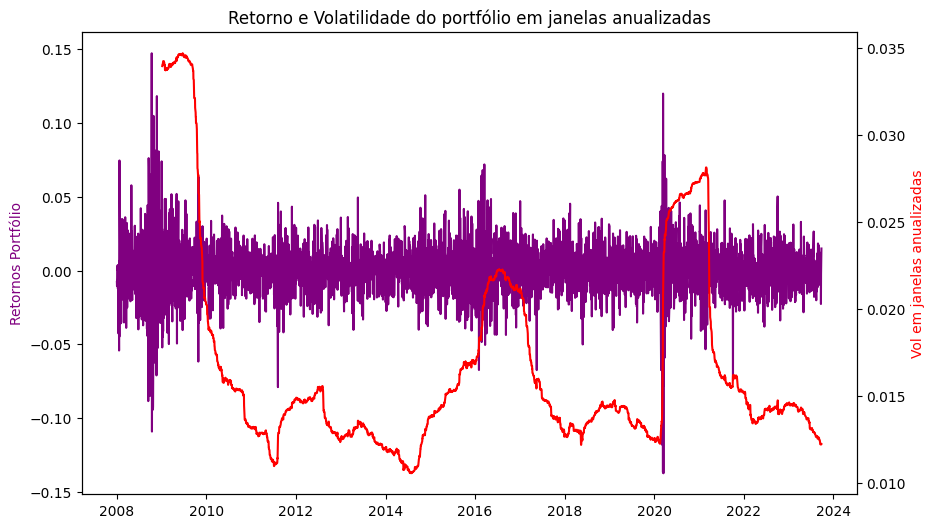

In [25]:
# Plotando o gráfico final

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(port_ret[0], color = "purple")
ax1.set_ylabel("Retornos Portfólio", color = "purple")

ax2 = ax1.twinx()
ax2.plot(roll_vol, color = "red")
ax2.set_ylabel("Vol em janelas anualizadas", color = "red")

plt.title("Retorno e Volatilidade do portfólio em janelas anualizadas")
plt.show()